In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


We will first define some 0-1 patterns:

In [3]:
numbers = [
'111111'
'100001'
'100001'
'100001'
'100001'
'111111'
,
'001000'
'001000'
'001000'
'001000'
'001000'
'001000'
,
'111111'
'000001'
'000001'
'111111'
'100000'
'111111'
,
'111111'
'000001'
'000001'
'111111'
'000001'
'111111'
,
'100001'
'100001'
'100001'
'111111'
'000001'
'000001'
,
'111111'
'100000'
'100000'
'111111'
'000001'
'111111'
,
'111111'
'100000'
'100000'
'111111'
'100001'
'111111'
,
'111111'
'000011'
'000110'
'001100'
'011000'
'110000'
,
]

In [4]:
X = np.array([[float(i) for i in n] for n in numbers]).T*2-1
X.shape

(36L, 8L)

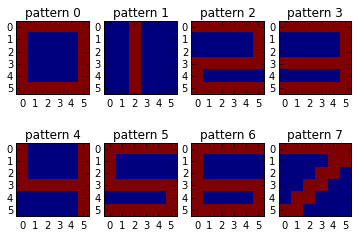

In [5]:
clf()
for n,d in enumerate(X.T):
    subplot(2, 4, n+1)
    imshow(d.reshape(6,6), interpolation='nearest')
    title('pattern %d' % (n,))

In [6]:
def simulate_hopfield(x,W):
    x = x.copy()
    hist = []
    while not (hist and np.all(hist[-1]==x)):
        hist.append(x.copy())
        for i in np.random.permutation(x.shape[0]):
            x[i] = np.sign(W[i,:].dot(x))
    return hist

In [7]:
Xused = X[:,:]
W = Xused.dot(Xused.T)

In [8]:
Xnoisy = X.copy()
nidx = np.random.rand(*X.shape) < 0.1
Xnoisy[nidx] *= -1

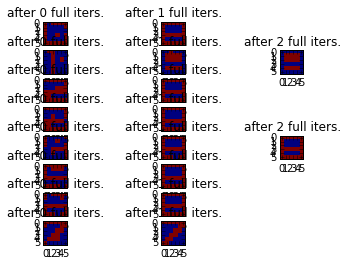

In [9]:
digitsim = [simulate_hopfield(Xnoisy[:,i], W) for i in xrange(Xnoisy.shape[1])]

maxl = max(len(x) for x in digitsim)

clf()
for r,xx in enumerate(digitsim):
    for i,l in enumerate(xx):
        subplot(len(digitsim), maxl, r*maxl +  i+1)
        imshow(xx[i].reshape(6,6), interpolation='nearest')
        title('after %d full iters.' % (i,))

In [10]:
def simulate_random_hopfield(x,W, maxreps=100):
    x = x.copy()
    hist = []
    rep = 0
    while not (hist and np.all(hist[-1]==x)) and rep<maxreps:
        rep += 1
        hist.append(x.copy())
        for i in np.random.permutation(x.shape[0]):
            a  = 1.0 / ( 1+np.exp(W[i,:].dot(x)) )
            x[i] = (np.random.rand()<a)*2.0-1.0
                
    return hist


In [20]:
figure()

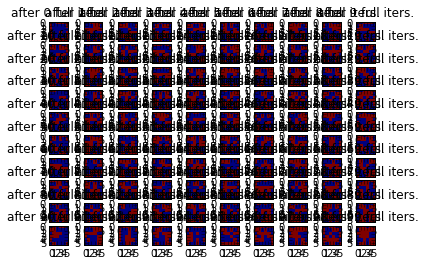

In [11]:
xx = simulate_random_hopfield(Xnoisy[:,0], W)
clf()
for i,l in enumerate(xx):
        subplot(10, 10, i+1)
        imshow(xx[i].reshape(6,6), interpolation='nearest')
        title('after %d full iters.' % (i,))

In [11]:
len(xx)

100